1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

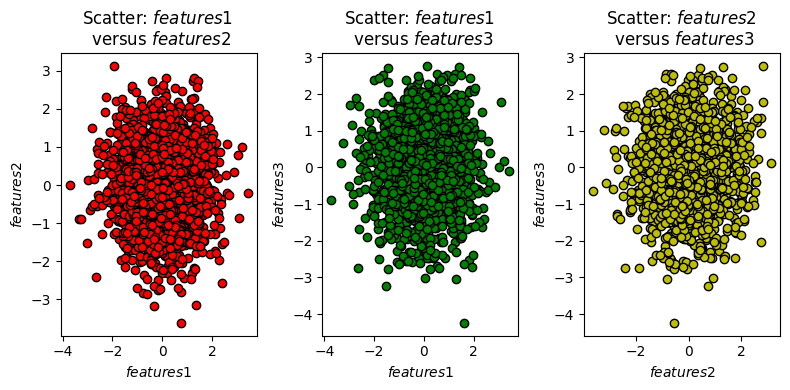

These features seem compleatly uncorrelated


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

input_file = 'data/regression_generated.csv'

df = pd.read_csv(input_file)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
ax1.scatter(x=df['features_1'], y=df['features_2'], marker='o', c='r', edgecolor='k')
ax1.set_title('Scatter: $features 1$ \n versus $features 2$')
ax1.set_xlabel('$features 1$')
ax1.set_ylabel('$features 2$')

ax2.scatter(x=df['features_1'], y=df['features_3'], marker='o', c='g', edgecolor='k')
ax2.set_title('Scatter: $features 1$ \n versus $features 3$')
ax2.set_xlabel('$features 1$')
ax2.set_ylabel('$features 3$')

ax3.scatter(x=df['features_2'], y=df['features_3'], marker='o', c='y', edgecolor='k')
ax3.set_title('Scatter: $features 2$ \n versus $features 3$')
ax3.set_xlabel('$features 2$')
ax3.set_ylabel('$features 3$')

plt.tight_layout()
plt.show()

print('These features seem compleatly uncorrelated')

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

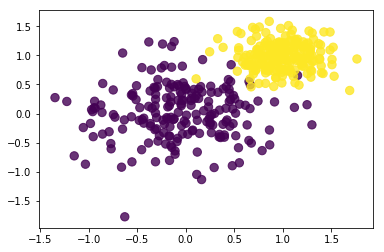

In [3]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

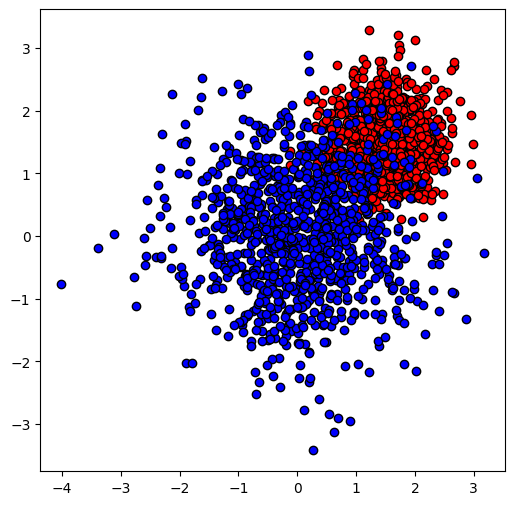

In [4]:
df = pd.DataFrame({
    'cat1' : tuple(np.random.randn(1000,2)*0.5 + 1.5),
    'cat2' : tuple(np.random.randn(1000,2))
})


fig, ax = plt.subplots(figsize=(6, 6)) 
ax.scatter(x=[x[0] for x in df['cat1']], y=[x[1] for x in df['cat1']], marker='o', c='r', edgecolor = 'k')
ax.scatter(x=[x[0] for x in df['cat2']], y=[x[1] for x in df['cat2']], marker='o', c='b', edgecolor = 'k')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

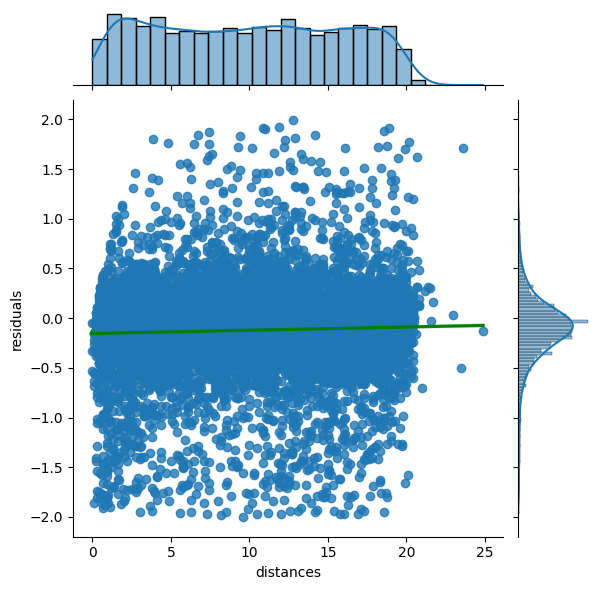

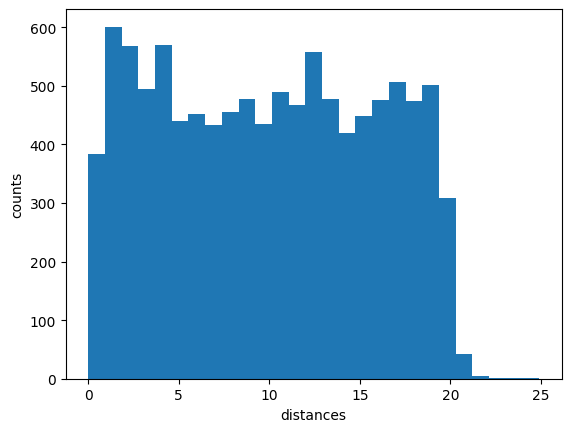

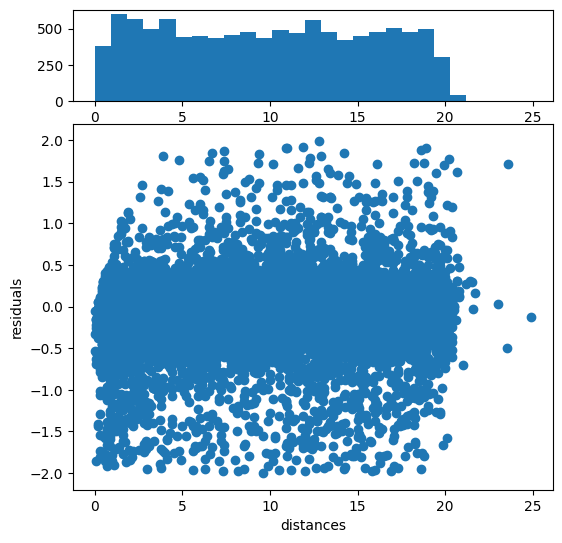

In [3]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'data/residuals_261.pkl'
infile = open(filename, 'rb')
pickle_file = pickle.load(infile)
infile.close()

df = pd.DataFrame(pickle_file.item())

df = df[abs(df['residuals']) <2]
df

g = sns.jointplot(x="distances", y="residuals", data=df, kind="reg", line_kws={"color": "green"}) 

fig, ax = plt.subplots()
h, bins, _ = plt.hist(df['distances'], bins='auto')
ax.set_xlabel('distances')
ax.set_ylabel('counts')


bins_centers = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

mean_res = [np.mean(df[(df['distances']>=bins[i]) & (df['distances']<bins[i+1])]['residuals']) for i in range(len(bins)-1)]

std_res = [np.std(df[(df['distances']>=bins[i]) & (df['distances']<bins[i+1])]['residuals']) for i in range(len(bins)-1)]




fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 1, height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                       hspace=0.1)
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)

ax = fig.add_subplot(gs[1, 0])

ax_histx.hist(df['distances'], bins='auto')
ax.scatter(df['distances'],df['residuals'])
ax.set_xlabel('distances')
ax.set_ylabel('residuals')
plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


C:\Users\pietr\AppData\Local\Temp\ipykernel_15812\2522009899.py:21: RuntimeWarning: divide by zero encountered in divide
  n_err = 1/np.sqrt(n)


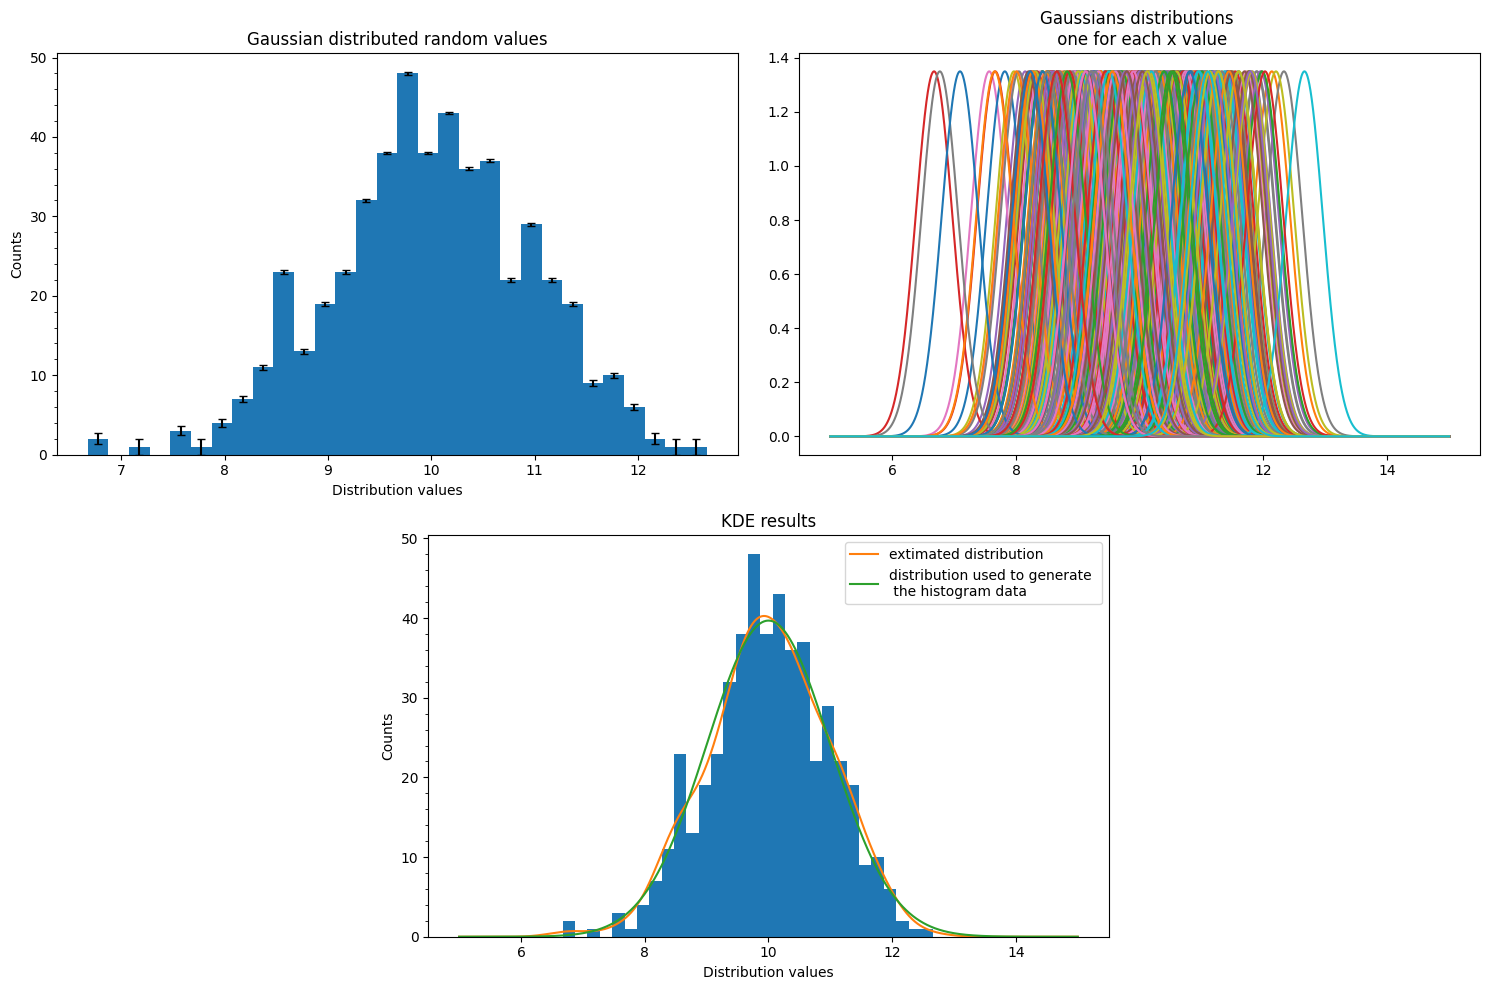

In [6]:
from scipy.stats import norm
from matplotlib.ticker import MultipleLocator
from scipy import integrate


mean = 10 
std = 1
bins_value = 30
x_min = 5
x_max = 15

x = np.random.normal(loc = mean, scale = std, size = (500,))

grid_size = (4,4)
fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot2grid(grid_size, (0, 0), colspan=2, rowspan=2 )
n, bins, _ = ax1.hist(x, bins = bins_value)
bin_center = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

n_err = 1/np.sqrt(n)
ax1.errorbar(bin_center, n, n_err, fmt='none', c='black', capsize=3)
ax1.set_xlabel('Distribution values')
ax1.set_ylabel('Counts')
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.set_title('Gaussian distributed random values')

ax4 = plt.subplot2grid(grid_size, (0, 2), colspan=2, rowspan=2)

scale = 1.06*x.std()*np.size(x)**(-1/5)
gauss_dist2 = [norm(loc=x[i], scale=scale) for i in range(len(x))]
xval = np.linspace(x_min,x_max,10000)
yval2 = []

for i,dist in enumerate(gauss_dist2):
    yval2.append(dist.pdf(xval))
    ax4.plot(xval,yval2[i])

ax4.set_title('Gaussians distributions \n one for each x value')

norm_sum2 = (np.sum(yval2, axis=0)*(integrate.trapz(n,bin_center)))/integrate.trapz(np.sum(yval2, axis=0),xval)
 
ax3 = plt.subplot2grid(grid_size, (2, 1), colspan=2, rowspan=2)
ax3.hist(x, bins = bins_value)

ax3.plot(xval,norm_sum2, label = 'extimated distribution')
ax3.plot(xval,(integrate.trapz(n,bin_center))*norm.pdf(xval, loc = mean, scale= std), label = 'distribution used to generate \n the histogram data')
ax3.set_xlabel('Distribution values')
ax3.set_ylabel('Counts')
ax3.yaxis.set_major_locator(MultipleLocator(10))
ax3.yaxis.set_minor_locator(MultipleLocator(2))
ax3.set_title('KDE results')
plt.legend()


plt.tight_layout()

plt.show()